In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Chhota Bhai,1966
1,Roaring Road,1926
2,Swipe,2011
3,Vestidas y alborotadas,1968
4,Lion,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
c=cast
c=c[(c.character=="Superman") | (c.character=="Batman")].sort_values(by= 'year')
c=c.groupby(['year','character']).size()
c=c.unstack()
c=c.fillna(0)

s=sum((c.Superman>c.Batman))
print('Superman years: ', s)


Superman years:  12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [6]:
b=sum((c.Batman>c.Superman))
print('Batman years:   ', b)

Batman years:    24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

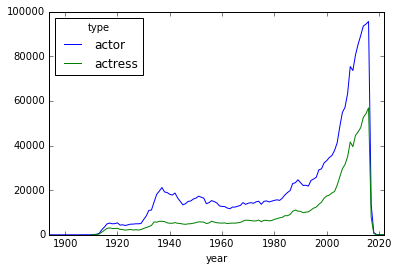

In [18]:
c=cast
c=c.groupby(['year', 'type']).size()
c =c.unstack('type')

c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

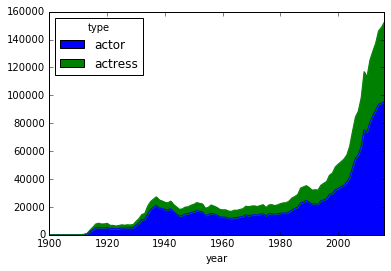

In [23]:
c=cast
c=c.groupby(['year', 'type']).size()
c =c.unstack('type')

c.plot(kind ='area', xlim =(1900,2016))

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

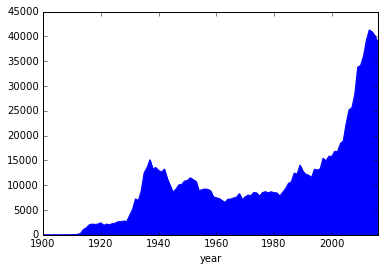

In [28]:
c=cast
c=c.groupby(['year', 'type']).size()
c =c.unstack('type')
dt=(c.actor-c.actress)

dt.plot(kind ='area', xlim =(1900,2016))

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

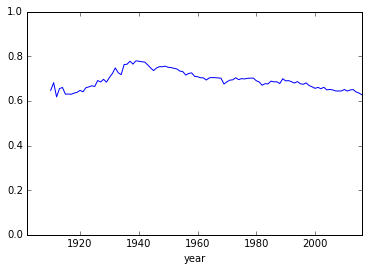

In [40]:
c=cast
c=c.groupby(['year', 'type']).size()
c=c.unstack('type')
c=(c.actor/(c.actor+c.actress))

c.plot(kind ='line', xlim =(1902,2016), ylim=(0,1))

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

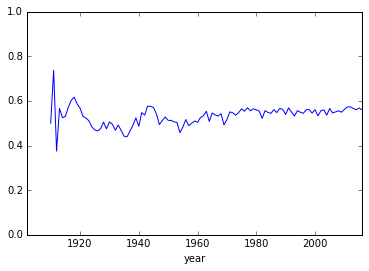

In [41]:
c=cast[cast.n == 2]

c=c.groupby(['year', 'type']).size()
c=c.unstack('type')
c=(c.actor/(c.actor+c.actress))

c.plot(kind ='line', xlim =(1902,2016), ylim=(0,1))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

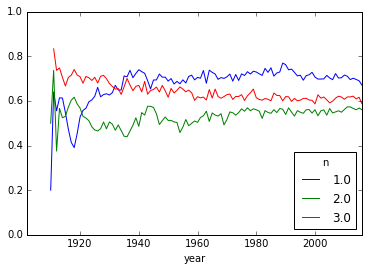

In [48]:
c=cast[cast.n <= 3]

c=c.groupby(['year', 'type', 'n']).size()
c=c.unstack('type')
w=(c.actor/(c.actor+c.actress))
w=w.unstack('n')

w.plot(kind ='line', xlim =(1902,2016), ylim=(0,1))